In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Here RangeIndex is 768
# also non-null count is 768 which implies no missing values.
# Also check Datatype all are float value, which implies there is no noise data.
# Now lets check the data values.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Here from above descriptive analysis, 
# Glucose, BloodPressure, Skinthickness, Insulin and BMI cannot be zero

In [6]:
list1 = ['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']
for i in list1:
    df[i] = np.where(df[i]==0,df[i].mean(),df[i])

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# In this dataset, we are not checking any outlier as we are going to use Deep learning method.

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
# Feature scaling is mandatory
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Deep Neural Network

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=15,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0)

In [21]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim = 8, 
                kernel_initializer = 'HeNormal',
                kernel_regularizer = tf.keras.regularizers.l2(0.01) ))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(8,activation='relu' ))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                288       
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 batch_normalization_3 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 8)                

In [23]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', 
              metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(x_test, y_test))#,callbacks = callbacks)

Epoch 1/500
20/20 [==============================] - 2s 16ms/step - loss: 1.4316 - accuracy: 0.5114 - val_loss: 2.1385 - val_accuracy: 0.3377
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 1.3629 - accuracy: 0.5700 - val_loss: 1.7139 - val_accuracy: 0.3506
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 1.3047 - accuracy: 0.5684 - val_loss: 1.5215 - val_accuracy: 0.3506
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 1.2263 - accuracy: 0.6010 - val_loss: 1.3786 - val_accuracy: 0.3571
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 1.1959 - accuracy: 0.6221 - val_loss: 1.2835 - val_accuracy: 0.3831
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 1.1363 - accuracy: 0.6531 - val_loss: 1.1968 - val_accuracy: 0.5065
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 1.1372 - accuracy: 0.6352 - val_loss: 1.1397 - val_accuracy: 0.5974
Epoch 8/500


Epoch 59/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5826 - accuracy: 0.7362 - val_loss: 0.5385 - val_accuracy: 0.7922
Epoch 60/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7492 - val_loss: 0.5265 - val_accuracy: 0.7857
Epoch 61/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.7492 - val_loss: 0.5324 - val_accuracy: 0.7857
Epoch 62/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5785 - accuracy: 0.7427 - val_loss: 0.5332 - val_accuracy: 0.7922
Epoch 63/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5833 - accuracy: 0.7345 - val_loss: 0.5171 - val_accuracy: 0.7857
Epoch 64/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5806 - accuracy: 0.7345 - val_loss: 0.5226 - val_accuracy: 0.7922
Epoch 65/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5917 - accuracy: 0.7248 - val_loss: 0.5118 - val_accuracy: 0.7857
Epoch 

20/20 [==============================] - 0s 6ms/step - loss: 0.5212 - accuracy: 0.7410 - val_loss: 0.4792 - val_accuracy: 0.7922
Epoch 117/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5215 - accuracy: 0.7541 - val_loss: 0.4527 - val_accuracy: 0.7922
Epoch 118/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5303 - accuracy: 0.7427 - val_loss: 0.4609 - val_accuracy: 0.7987
Epoch 119/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5341 - accuracy: 0.7508 - val_loss: 0.4749 - val_accuracy: 0.7922
Epoch 120/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5250 - accuracy: 0.7524 - val_loss: 0.4598 - val_accuracy: 0.7987
Epoch 121/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5217 - accuracy: 0.7492 - val_loss: 0.4477 - val_accuracy: 0.7987
Epoch 122/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5264 - accuracy: 0.7459 - val_loss: 0.4487 - val_accuracy: 0.7857
Epoch 123/500

20/20 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.7459 - val_loss: 0.4433 - val_accuracy: 0.7987
Epoch 174/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5180 - accuracy: 0.7427 - val_loss: 0.4543 - val_accuracy: 0.7987
Epoch 175/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4945 - accuracy: 0.7671 - val_loss: 0.4434 - val_accuracy: 0.8052
Epoch 176/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5072 - accuracy: 0.7638 - val_loss: 0.4634 - val_accuracy: 0.7922
Epoch 177/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5311 - accuracy: 0.7541 - val_loss: 0.4498 - val_accuracy: 0.7987
Epoch 178/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4911 - accuracy: 0.7541 - val_loss: 0.4464 - val_accuracy: 0.7922
Epoch 179/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5222 - accuracy: 0.7443 - val_loss: 0.4465 - val_accuracy: 0.7922
Epoch 180/500

20/20 [==============================] - 0s 5ms/step - loss: 0.4966 - accuracy: 0.7720 - val_loss: 0.4376 - val_accuracy: 0.7922
Epoch 231/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5055 - accuracy: 0.7769 - val_loss: 0.4401 - val_accuracy: 0.7922
Epoch 232/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5159 - accuracy: 0.7476 - val_loss: 0.4360 - val_accuracy: 0.7987
Epoch 233/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5157 - accuracy: 0.7752 - val_loss: 0.4381 - val_accuracy: 0.7987
Epoch 234/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5193 - accuracy: 0.7345 - val_loss: 0.4596 - val_accuracy: 0.7727
Epoch 235/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.7427 - val_loss: 0.4418 - val_accuracy: 0.7662
Epoch 236/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5005 - accuracy: 0.7671 - val_loss: 0.4347 - val_accuracy: 0.7597
Epoch 237/500

20/20 [==============================] - 0s 5ms/step - loss: 0.5004 - accuracy: 0.7508 - val_loss: 0.4378 - val_accuracy: 0.7987
Epoch 288/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5043 - accuracy: 0.7590 - val_loss: 0.4346 - val_accuracy: 0.7792
Epoch 289/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5102 - accuracy: 0.7378 - val_loss: 0.4286 - val_accuracy: 0.7922
Epoch 290/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5020 - accuracy: 0.7606 - val_loss: 0.4308 - val_accuracy: 0.7922
Epoch 291/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4970 - accuracy: 0.7557 - val_loss: 0.4941 - val_accuracy: 0.7922
Epoch 292/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5094 - accuracy: 0.7769 - val_loss: 0.4413 - val_accuracy: 0.7662
Epoch 293/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4966 - accuracy: 0.7476 - val_loss: 0.4310 - val_accuracy: 0.7727
Epoch 294/500

20/20 [==============================] - 0s 6ms/step - loss: 0.5200 - accuracy: 0.7622 - val_loss: 0.4411 - val_accuracy: 0.7727
Epoch 345/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5241 - accuracy: 0.7508 - val_loss: 0.4910 - val_accuracy: 0.7468
Epoch 346/500
20/20 [==============================] - 0s 6ms/step - loss: 0.4973 - accuracy: 0.7476 - val_loss: 0.4547 - val_accuracy: 0.7792
Epoch 347/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5214 - accuracy: 0.7378 - val_loss: 0.4282 - val_accuracy: 0.7792
Epoch 348/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5163 - accuracy: 0.7557 - val_loss: 0.4360 - val_accuracy: 0.7987
Epoch 349/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.7313 - val_loss: 0.4419 - val_accuracy: 0.7792
Epoch 350/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5046 - accuracy: 0.7492 - val_loss: 0.4366 - val_accuracy: 0.7727
Epoch 351/500

20/20 [==============================] - 0s 6ms/step - loss: 0.5016 - accuracy: 0.7557 - val_loss: 0.4261 - val_accuracy: 0.8052
Epoch 402/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5008 - accuracy: 0.7638 - val_loss: 0.4264 - val_accuracy: 0.7922
Epoch 403/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5150 - accuracy: 0.7492 - val_loss: 0.4280 - val_accuracy: 0.7987
Epoch 404/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.7736 - val_loss: 0.4237 - val_accuracy: 0.7987
Epoch 405/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5119 - accuracy: 0.7459 - val_loss: 0.4367 - val_accuracy: 0.7987
Epoch 406/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5062 - accuracy: 0.7573 - val_loss: 0.4433 - val_accuracy: 0.8052
Epoch 407/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5024 - accuracy: 0.7606 - val_loss: 0.4416 - val_accuracy: 0.7922
Epoch 408/500

20/20 [==============================] - 0s 5ms/step - loss: 0.5077 - accuracy: 0.7410 - val_loss: 0.4457 - val_accuracy: 0.7662
Epoch 459/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4929 - accuracy: 0.7476 - val_loss: 0.4498 - val_accuracy: 0.7792
Epoch 460/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4900 - accuracy: 0.7736 - val_loss: 0.4356 - val_accuracy: 0.7792
Epoch 461/500
20/20 [==============================] - 0s 7ms/step - loss: 0.4985 - accuracy: 0.7671 - val_loss: 0.4344 - val_accuracy: 0.7922
Epoch 462/500
20/20 [==============================] - 0s 6ms/step - loss: 0.4872 - accuracy: 0.7524 - val_loss: 0.4384 - val_accuracy: 0.7792
Epoch 463/500
20/20 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.7622 - val_loss: 0.4447 - val_accuracy: 0.7727
Epoch 464/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5055 - accuracy: 0.7638 - val_loss: 0.4337 - val_accuracy: 0.7662
Epoch 465/500

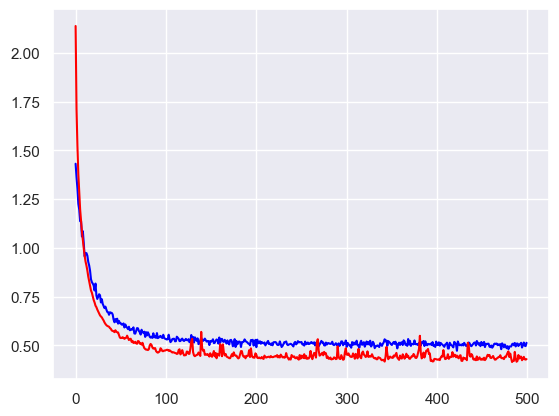

In [25]:
plt.plot(history.history['loss'],color = 'blue')
plt.plot(history.history['val_loss'],color = 'red')

# HyperTuning

In [26]:
!pip install keras-tuner --upgrade

In [27]:
import keras_tuner as kt

In [28]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_of_hidden_layer', min_value=1, max_value=10)):
        if counter==0:
            model.add(Dense(hp.Int('no_of_neurons' + str(i), min_value=8, max_value=128, step=8),
                      activation ='relu', input_dim=8))
            model.add(Dropout(hp.Choice('dropout' + str(i), 
                                  values=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])))
        else:
            model.add(Dense(hp.Int('no_of_neurons' + str(i), min_value=8, max_value=128, step=8),
                      activation = 'relu'))
            model.add(Dropout(hp.Choice('dropout' + str(i), 
                                  values=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])))
        counter +=1
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice("optimizer", 
                                    values=['rmsprop','sgd','adadelta','adam','adagrad','tanh','leaky_relu']),
                                    loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [29]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10, directory='HyperParameter',
                        project_name='mydirectory')

INFO:tensorflow:Reloading Tuner from HyperParameter\mydirectory\tuner0.json


In [30]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [31]:
tuner.get_best_hyperparameters()[0].values

{'num_of_hidden_layer': 10,
 'no_of_neurons0': 56,
 'activation0': 'relu',
 'dropout0': 0.35,
 'optimizer': 'rmsprop',
 'no_of_neurons1': 80,
 'activation1': 'sigmoid',
 'dropout1': 0.2,
 'no_of_neurons2': 40,
 'activation2': 'tanh',
 'dropout2': 0.25,
 'no_of_neurons3': 8,
 'activation3': 'softmax',
 'dropout3': 0.1,
 'no_of_neurons4': 16,
 'activation4': 'leaky_relu',
 'dropout4': 0.45,
 'no_of_neurons5': 104,
 'activation5': 'tanh',
 'dropout5': 0.2,
 'no_of_neurons6': 104,
 'activation6': 'relu',
 'dropout6': 0.15,
 'no_of_neurons7': 56,
 'activation7': 'tanh',
 'dropout7': 0.45,
 'no_of_neurons8': 56,
 'activation8': 'relu',
 'dropout8': 0.25,
 'no_of_neurons9': 16,
 'activation9': 'relu',
 'dropout9': 0.5}

In [32]:
model = tuner.get_best_models(num_models=1)[0]

In [33]:
history1 = model.fit(x_train, y_train, batch_size=32, epochs=500, 
                     initial_epoch=5, validation_data=(x_test, y_test))

Epoch 6/500
20/20 [==============================] - 2s 20ms/step - loss: 1.6134 - accuracy: 0.5945 - val_loss: 0.6997 - val_accuracy: 0.3312
Epoch 7/500
20/20 [==============================] - 0s 7ms/step - loss: 0.8934 - accuracy: 0.6042 - val_loss: 0.6911 - val_accuracy: 0.6104
Epoch 8/500
20/20 [==============================] - 0s 7ms/step - loss: 0.8422 - accuracy: 0.5798 - val_loss: 0.6836 - val_accuracy: 0.6688
Epoch 9/500
20/20 [==============================] - 0s 7ms/step - loss: 0.7366 - accuracy: 0.6287 - val_loss: 0.6808 - val_accuracy: 0.6688
Epoch 10/500
20/20 [==============================] - 0s 6ms/step - loss: 0.7138 - accuracy: 0.6189 - val_loss: 0.6774 - val_accuracy: 0.6688
Epoch 11/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6874 - accuracy: 0.6205 - val_loss: 0.6732 - val_accuracy: 0.6688
Epoch 12/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.6384 - val_loss: 0.6675 - val_accuracy: 0.6688
Epoch 13/

Epoch 64/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6545 - accuracy: 0.6433 - val_loss: 0.6362 - val_accuracy: 0.6688
Epoch 65/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6532 - accuracy: 0.6450 - val_loss: 0.6358 - val_accuracy: 0.6688
Epoch 66/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6443 - accuracy: 0.6466 - val_loss: 0.6329 - val_accuracy: 0.6688
Epoch 67/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6539 - accuracy: 0.6466 - val_loss: 0.6337 - val_accuracy: 0.6688
Epoch 68/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6462 - accuracy: 0.6433 - val_loss: 0.6279 - val_accuracy: 0.6688
Epoch 69/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6435 - accuracy: 0.6498 - val_loss: 0.6255 - val_accuracy: 0.6688
Epoch 70/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6475 - accuracy: 0.6482 - val_loss: 0.6275 - val_accuracy: 0.6688
Epoch 

20/20 [==============================] - 0s 6ms/step - loss: 0.6332 - accuracy: 0.6515 - val_loss: 0.5918 - val_accuracy: 0.6688
Epoch 122/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6217 - accuracy: 0.6645 - val_loss: 0.5880 - val_accuracy: 0.6688
Epoch 123/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6198 - accuracy: 0.6498 - val_loss: 0.5821 - val_accuracy: 0.6688
Epoch 124/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6408 - accuracy: 0.6596 - val_loss: 0.5896 - val_accuracy: 0.6688
Epoch 125/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6241 - accuracy: 0.6596 - val_loss: 0.5817 - val_accuracy: 0.6688
Epoch 126/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6353 - accuracy: 0.6547 - val_loss: 0.5850 - val_accuracy: 0.6688
Epoch 127/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6432 - accuracy: 0.6645 - val_loss: 0.5857 - val_accuracy: 0.6688
Epoch 128/500

20/20 [==============================] - 0s 7ms/step - loss: 0.5933 - accuracy: 0.6678 - val_loss: 0.6107 - val_accuracy: 0.6688
Epoch 179/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6008 - accuracy: 0.6824 - val_loss: 0.6138 - val_accuracy: 0.6623
Epoch 180/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5982 - accuracy: 0.6873 - val_loss: 0.5939 - val_accuracy: 0.6688
Epoch 181/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6098 - accuracy: 0.6857 - val_loss: 0.5850 - val_accuracy: 0.6753
Epoch 182/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5951 - accuracy: 0.7020 - val_loss: 0.5911 - val_accuracy: 0.6688
Epoch 183/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6076 - accuracy: 0.6759 - val_loss: 0.5852 - val_accuracy: 0.6623
Epoch 184/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6005 - accuracy: 0.6743 - val_loss: 0.6062 - val_accuracy: 0.6688
Epoch 185/500

20/20 [==============================] - 0s 7ms/step - loss: 0.5904 - accuracy: 0.6971 - val_loss: 0.6271 - val_accuracy: 0.6948
Epoch 236/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5787 - accuracy: 0.6954 - val_loss: 0.6253 - val_accuracy: 0.6818
Epoch 237/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5776 - accuracy: 0.6792 - val_loss: 0.5922 - val_accuracy: 0.7143
Epoch 238/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5969 - accuracy: 0.6629 - val_loss: 0.6283 - val_accuracy: 0.6818
Epoch 239/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5931 - accuracy: 0.7101 - val_loss: 0.6252 - val_accuracy: 0.6688
Epoch 240/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5982 - accuracy: 0.6954 - val_loss: 0.6088 - val_accuracy: 0.6688
Epoch 241/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.6824 - val_loss: 0.6138 - val_accuracy: 0.6753
Epoch 242/500

20/20 [==============================] - 0s 7ms/step - loss: 0.5923 - accuracy: 0.6922 - val_loss: 0.5722 - val_accuracy: 0.6753
Epoch 293/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5701 - accuracy: 0.7003 - val_loss: 0.5600 - val_accuracy: 0.7273
Epoch 294/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5822 - accuracy: 0.6971 - val_loss: 0.5666 - val_accuracy: 0.7208
Epoch 295/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5530 - accuracy: 0.7101 - val_loss: 0.5762 - val_accuracy: 0.7013
Epoch 296/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5987 - accuracy: 0.6971 - val_loss: 0.5720 - val_accuracy: 0.6753
Epoch 297/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5659 - accuracy: 0.6857 - val_loss: 0.5710 - val_accuracy: 0.7078
Epoch 298/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5798 - accuracy: 0.6873 - val_loss: 0.5907 - val_accuracy: 0.6883
Epoch 299/500

20/20 [==============================] - 0s 7ms/step - loss: 0.6080 - accuracy: 0.6971 - val_loss: 0.6080 - val_accuracy: 0.6623
Epoch 350/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5764 - accuracy: 0.7052 - val_loss: 0.6063 - val_accuracy: 0.6688
Epoch 351/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5759 - accuracy: 0.7020 - val_loss: 0.6113 - val_accuracy: 0.6818
Epoch 352/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5707 - accuracy: 0.7134 - val_loss: 0.6487 - val_accuracy: 0.7143
Epoch 353/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5369 - accuracy: 0.7182 - val_loss: 0.6770 - val_accuracy: 0.7143
Epoch 354/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5600 - accuracy: 0.7150 - val_loss: 0.6689 - val_accuracy: 0.7208
Epoch 355/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6053 - accuracy: 0.7036 - val_loss: 0.6458 - val_accuracy: 0.7078
Epoch 356/500

20/20 [==============================] - 0s 7ms/step - loss: 0.5508 - accuracy: 0.7166 - val_loss: 0.6439 - val_accuracy: 0.7208
Epoch 407/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5788 - accuracy: 0.6971 - val_loss: 0.7126 - val_accuracy: 0.6623
Epoch 408/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5668 - accuracy: 0.6873 - val_loss: 0.8410 - val_accuracy: 0.6688
Epoch 409/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5698 - accuracy: 0.7068 - val_loss: 0.7173 - val_accuracy: 0.6818
Epoch 410/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5551 - accuracy: 0.7248 - val_loss: 0.6481 - val_accuracy: 0.6753
Epoch 411/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5756 - accuracy: 0.6971 - val_loss: 0.6911 - val_accuracy: 0.6818
Epoch 412/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5419 - accuracy: 0.7248 - val_loss: 0.7030 - val_accuracy: 0.7208
Epoch 413/500

20/20 [==============================] - 0s 6ms/step - loss: 0.5365 - accuracy: 0.7182 - val_loss: 0.8899 - val_accuracy: 0.7338
Epoch 464/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5448 - accuracy: 0.7166 - val_loss: 0.7596 - val_accuracy: 0.7143
Epoch 465/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5342 - accuracy: 0.7345 - val_loss: 0.7548 - val_accuracy: 0.7273
Epoch 466/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5202 - accuracy: 0.7280 - val_loss: 0.7557 - val_accuracy: 0.7208
Epoch 467/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5470 - accuracy: 0.7231 - val_loss: 0.9408 - val_accuracy: 0.6883
Epoch 468/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5567 - accuracy: 0.6906 - val_loss: 1.0631 - val_accuracy: 0.6753
Epoch 469/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5635 - accuracy: 0.7264 - val_loss: 0.8952 - val_accuracy: 0.6948
Epoch 470/500